In [117]:
import numpy as numpy
import pandas as pd

In [118]:
salary = pd.read_csv('./data/Salary_Data.csv')
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [119]:
for col in salary.columns:
    if salary[col].dtypes == 'float64':
        salary[col] = salary[col].fillna(salary[col].mean())
    else :
        salary[col].dropna(inplace=True)
salary.dropna(inplace=True)
salary.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [121]:
X = salary.drop('Salary',axis=1)
Y = salary['Salary']

# Cleaning Data

In [122]:
salary.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [124]:
cat_impute = SimpleImputer(strategy="constant",fill_value="missing")
num_impute =SimpleImputer(strategy="mean")

cat_features = ['Gender','Education Level','Job Title']
num_features = ['Age','Years of Experience']

In [132]:
# trans = ColumnTransformer([
#     ('cat_impute',cat_impute,cat_features),
#     ('num_impute',num_impute,num_features)
# ])

# new_X = trans.fit_transform(X)
# df = pd.DataFrame(new_X)
# df

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6701, dtype: float64

In [126]:
Y.dropna(inplace=True)
Y.isna().sum()

0

# Converting non-numeric to numeric features

In [127]:
from sklearn.preprocessing import OneHotEncoder


In [128]:
one = OneHotEncoder()
t = ColumnTransformer([
    ('one',one,cat_features)
],remainder="passthrough")

encode_x = t.fit_transform(X)
# df.DataFrame(encode_x)

In [129]:
pd.DataFrame(encode_x.toarray())

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,5.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,20.0
6697,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,3.0
6698,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,4.0
6699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,14.0


In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(encode_x,Y,test_size=0.3) 


In [137]:
from sklearn.linear_model import Ridge
model = Ridge()

In [139]:
model.fit(X_train,Y_train);

In [140]:
model.score(X_test,Y_test) # coefficient of determination

0.8828325336871714

<b>Perfect Realtionship between the X features and Y values</b> as Coefficient of Determination is between <b>0.8 <r < 1 <b>

In [141]:
Y_predict = model.predict(X_test)

# Plotting scatterplot for visual analysis

In [142]:
import matplotlib.pyplot as plt

C:\Users\vedant\AppData\Local\Temp\ipykernel_21176\1515433763.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


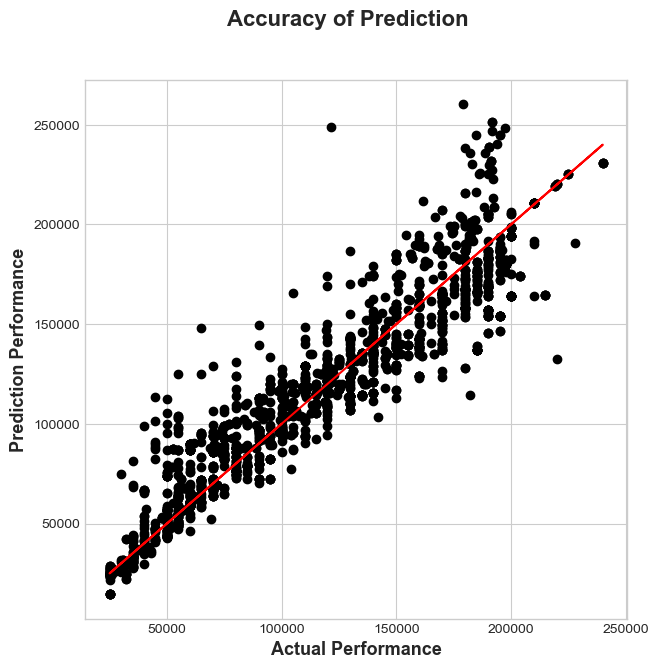

In [146]:
plt.style.use("seaborn-whitegrid")
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(Y_test,Y_predict,c="black")
# ax.set_xlim([30,195])
# ax.set_ylim([30,180])
# ax.set(xlabel="Actual",ylabel="Predicted")
ax.plot(Y_test,Y_test,c="red")
ax.set_xlabel("Actual Performance",fontweight = "bold",fontsize=13)
ax.set_ylabel("Prediction Performance",fontweight = "bold",fontsize=13)
fig.suptitle("Accuracy of Prediction",fontweight = "bold",fontsize=16);

In [147]:
import pickle

In [148]:
pickle.dump(model,open('./Trained_Model/Salary_Prediction.pkl','wb'))

In [149]:
fig.savefig('./images/SalaryModel.png')